# ARIMA


Imports from /src

In [1]:
from utility import *
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from math import *

Using TensorFlow backend.


Mention the name of ISO you want to run ARIMA predictions on

In [10]:
regional_ISO_name = 'NYISO'

Fetch input from ../dataset/[ISO folder]

Dataset total size:  (17559, 1)


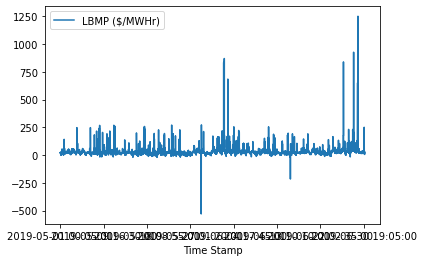

In [11]:
input = fetchData(False, regional_ISO_name)
print('Dataset total size: ', input.shape)
input.head()
input.plot()
plt.show()

Let’s also take a quick look at an autocorrelation plot of the time series. This is also built-in to Pandas. The example below plots the autocorrelation for a large number of lags in the time series.
 
A good starting point for the AR parameter of the model may be around the x-intercept of the graph below.

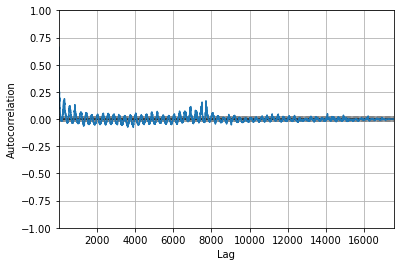

In [12]:
autocorrelation_plot(input)
plt.show()

We fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

/Users/zeenat/anaconda3/envs/tensorflow-time-series-forecasting/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/zeenat/anaconda3/envs/tensorflow-time-series-forecasting/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/zeenat/anaconda3/envs/tensorflow-time-series-forecasting/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                               SARIMAX Results                                
Dep. Variable:          LBMP ($/MWHr)   No. Observations:                17559
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -81907.763
Date:                Tue, 16 Mar 2021   AIC                         163827.526
Time:                        07:35:26   BIC                         163874.166
Sample:                             0   HQIC                        163842.882
                              - 17559                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4281      0.001   -567.543      0.000      -0.430      -0.427
ar.L2         -0.2813      0.001   -244.732      0.000      -0.284      -0.279
ar.L3         -0.2548      0.001   -242.696      0.0

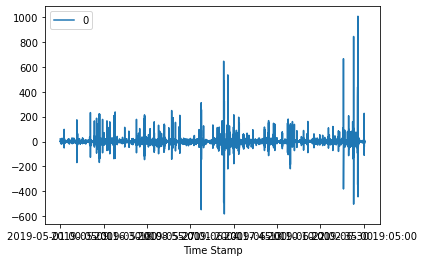

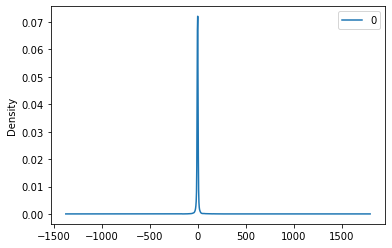

                  0
count  17559.000000
mean       0.000439
std       25.688663
min     -580.907031
25%       -2.241337
50%       -0.090147
75%        1.524712
max     1005.172269


In [13]:
model = ARIMA(input, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

### Rolling Forecast ARIMA Model
A crude way to perform this is to re-create the ARIMA model after each new observation is received.
We manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended each iteration.

In [14]:
X = input.values
train = X[:]
label_df = fetchData(True, regional_ISO_name)
test = label_df.values

In [15]:
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(12,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('t = %f --- predicted=%f, expected=%f' % (t, yhat, obs))

t = 0.000000 --- predicted=16.656264, expected=27.850000
t = 1.000000 --- predicted=24.743705, expected=27.850000
t = 2.000000 --- predicted=24.383169, expected=23.550000
t = 3.000000 --- predicted=21.336675, expected=19.130000
t = 4.000000 --- predicted=19.200836, expected=19.130000
t = 5.000000 --- predicted=19.289116, expected=21.560000
t = 6.000000 --- predicted=22.170004, expected=26.500000
t = 7.000000 --- predicted=24.875913, expected=26.460000
t = 8.000000 --- predicted=24.730860, expected=26.420000
t = 9.000000 --- predicted=23.397235, expected=19.130000
t = 10.000000 --- predicted=19.494409, expected=19.890000
t = 11.000000 --- predicted=20.444389, expected=20.670000
t = 12.000000 --- predicted=21.640021, expected=21.530000
t = 13.000000 --- predicted=22.840785, expected=20.640000
t = 14.000000 --- predicted=21.800967, expected=20.660000
t = 15.000000 --- predicted=20.651929, expected=20.660000
t = 16.000000 --- predicted=20.533328, expected=20.660000
t = 17.000000 --- predic

t = 141.000000 --- predicted=24.193699, expected=26.500000
t = 142.000000 --- predicted=25.321295, expected=25.010000
t = 143.000000 --- predicted=24.757154, expected=25.290000
t = 144.000000 --- predicted=24.669312, expected=23.800000
t = 145.000000 --- predicted=23.877225, expected=25.290000
t = 146.000000 --- predicted=24.676028, expected=26.300000
t = 147.000000 --- predicted=25.574086, expected=26.910000
t = 148.000000 --- predicted=26.146336, expected=28.080000
t = 149.000000 --- predicted=26.800334, expected=26.800000
t = 150.000000 --- predicted=26.228415, expected=25.620000
t = 151.000000 --- predicted=25.652889, expected=26.750000
t = 152.000000 --- predicted=26.308394, expected=25.590000
t = 153.000000 --- predicted=25.974992, expected=26.820000
t = 154.000000 --- predicted=26.621502, expected=27.640000
t = 155.000000 --- predicted=26.934839, expected=24.270000
t = 156.000000 --- predicted=25.209202, expected=24.560000
t = 157.000000 --- predicted=24.985310, expected=25.5100

t = 280.000000 --- predicted=25.703715, expected=27.330000
t = 281.000000 --- predicted=25.720839, expected=26.140000
t = 282.000000 --- predicted=25.249996, expected=25.710000
t = 283.000000 --- predicted=25.355428, expected=25.520000
t = 284.000000 --- predicted=25.510993, expected=24.870000
t = 285.000000 --- predicted=25.184611, expected=24.810000
t = 286.000000 --- predicted=24.965148, expected=25.420000
t = 287.000000 --- predicted=24.952935, expected=25.160000
t = 288.000000 --- predicted=24.959289, expected=26.330000
t = 289.000000 --- predicted=25.652760, expected=32.720000
t = 290.000000 --- predicted=29.406130, expected=31.990000
t = 291.000000 --- predicted=29.994528, expected=30.430000
t = 292.000000 --- predicted=29.243792, expected=26.410000
t = 293.000000 --- predicted=26.865469, expected=25.900000
t = 294.000000 --- predicted=26.389300, expected=25.030000
t = 295.000000 --- predicted=26.433157, expected=25.020000
t = 296.000000 --- predicted=26.297756, expected=17.1600

t = 420.000000 --- predicted=29.856135, expected=35.190000
t = 421.000000 --- predicted=31.124881, expected=25.730000
t = 422.000000 --- predicted=26.517680, expected=31.530000
t = 423.000000 --- predicted=29.219291, expected=26.880000
t = 424.000000 --- predicted=28.054367, expected=27.650000
t = 425.000000 --- predicted=28.366709, expected=19.090000
t = 426.000000 --- predicted=23.431653, expected=15.650000
t = 427.000000 --- predicted=19.745513, expected=22.540000
t = 428.000000 --- predicted=22.899323, expected=27.040000
t = 429.000000 --- predicted=26.289249, expected=28.320000
t = 430.000000 --- predicted=27.653456, expected=28.120000
t = 431.000000 --- predicted=27.062594, expected=28.690000
t = 432.000000 --- predicted=26.911580, expected=28.240000
t = 433.000000 --- predicted=27.664825, expected=30.990000
t = 434.000000 --- predicted=29.345728, expected=29.760000
t = 435.000000 --- predicted=29.311213, expected=23.300000
t = 436.000000 --- predicted=25.250847, expected=28.5100

t = 559.000000 --- predicted=26.793568, expected=24.790000
t = 560.000000 --- predicted=25.381554, expected=20.280000
t = 561.000000 --- predicted=22.579147, expected=20.280000
t = 562.000000 --- predicted=22.027204, expected=22.240000
t = 563.000000 --- predicted=23.078619, expected=27.250000
t = 564.000000 --- predicted=26.256997, expected=27.750000
t = 565.000000 --- predicted=27.240598, expected=25.780000
t = 566.000000 --- predicted=25.635151, expected=51.020000
t = 567.000000 --- predicted=38.369262, expected=23.860000
t = 568.000000 --- predicted=27.587591, expected=24.010000
t = 569.000000 --- predicted=25.172901, expected=52.650000
t = 570.000000 --- predicted=39.743916, expected=29.780000
t = 571.000000 --- predicted=32.426607, expected=22.500000
t = 572.000000 --- predicted=27.269151, expected=57.870000
t = 573.000000 --- predicted=42.273034, expected=16.330000
t = 574.000000 --- predicted=25.716728, expected=19.000000
t = 575.000000 --- predicted=24.668680, expected=17.0400

t = 698.000000 --- predicted=21.590890, expected=22.190000
t = 699.000000 --- predicted=21.483153, expected=21.900000
t = 700.000000 --- predicted=21.002764, expected=19.280000
t = 701.000000 --- predicted=19.311407, expected=27.630000
t = 702.000000 --- predicted=23.916111, expected=25.320000
t = 703.000000 --- predicted=23.904243, expected=24.450000
t = 704.000000 --- predicted=23.410371, expected=27.630000
t = 705.000000 --- predicted=24.973388, expected=34.220000
t = 706.000000 --- predicted=29.164540, expected=34.220000
t = 707.000000 --- predicted=30.882087, expected=34.250000
t = 708.000000 --- predicted=30.856075, expected=34.010000
t = 709.000000 --- predicted=30.939539, expected=30.160000
t = 710.000000 --- predicted=29.426594, expected=27.010000
t = 711.000000 --- predicted=28.061621, expected=27.320000
t = 712.000000 --- predicted=28.076980, expected=27.480000
t = 713.000000 --- predicted=28.155577, expected=27.460000
t = 714.000000 --- predicted=28.344326, expected=27.1100

t = 837.000000 --- predicted=25.897071, expected=32.580000
t = 838.000000 --- predicted=29.657060, expected=32.600000
t = 839.000000 --- predicted=30.653668, expected=22.850000
t = 840.000000 --- predicted=25.593585, expected=20.290000
t = 841.000000 --- predicted=22.793777, expected=20.470000
t = 842.000000 --- predicted=22.599925, expected=20.520000
t = 843.000000 --- predicted=23.306705, expected=20.530000
t = 844.000000 --- predicted=23.001876, expected=20.530000
t = 845.000000 --- predicted=21.774751, expected=20.640000
t = 846.000000 --- predicted=21.324066, expected=22.110000
t = 847.000000 --- predicted=22.206595, expected=21.100000
t = 848.000000 --- predicted=22.091234, expected=20.560000
t = 849.000000 --- predicted=21.733291, expected=19.130000
t = 850.000000 --- predicted=20.825239, expected=19.020000
t = 851.000000 --- predicted=20.282728, expected=21.240000
t = 852.000000 --- predicted=20.992927, expected=20.690000
t = 853.000000 --- predicted=20.778431, expected=20.4400

t = 976.000000 --- predicted=21.354917, expected=22.130000
t = 977.000000 --- predicted=21.891694, expected=25.360000
t = 978.000000 --- predicted=23.723683, expected=26.440000
t = 979.000000 --- predicted=24.657929, expected=26.520000
t = 980.000000 --- predicted=24.788312, expected=30.460000
t = 981.000000 --- predicted=26.903694, expected=29.090000
t = 982.000000 --- predicted=26.870893, expected=28.030000
t = 983.000000 --- predicted=26.752926, expected=38.690000
t = 984.000000 --- predicted=32.530417, expected=30.600000
t = 985.000000 --- predicted=29.849953, expected=30.870000
t = 986.000000 --- predicted=29.527414, expected=29.830000
t = 987.000000 --- predicted=28.769356, expected=29.890000
t = 988.000000 --- predicted=29.244143, expected=29.990000
t = 989.000000 --- predicted=30.200281, expected=29.910000
t = 990.000000 --- predicted=29.838334, expected=27.600000
t = 991.000000 --- predicted=28.497519, expected=28.370000
t = 992.000000 --- predicted=28.617730, expected=26.7500

t = 1113.000000 --- predicted=28.422294, expected=28.610000
t = 1114.000000 --- predicted=28.365698, expected=28.680000
t = 1115.000000 --- predicted=28.441259, expected=29.820000
t = 1116.000000 --- predicted=29.183218, expected=28.990000
t = 1117.000000 --- predicted=29.007374, expected=28.820000
t = 1118.000000 --- predicted=28.859324, expected=27.950000
t = 1119.000000 --- predicted=28.397166, expected=26.620000
t = 1120.000000 --- predicted=27.574743, expected=24.890000
t = 1121.000000 --- predicted=26.485996, expected=24.760000
t = 1122.000000 --- predicted=26.090432, expected=24.390000
t = 1123.000000 --- predicted=25.757429, expected=23.520000
t = 1124.000000 --- predicted=25.104686, expected=21.390000
t = 1125.000000 --- predicted=23.606179, expected=20.040000
t = 1126.000000 --- predicted=22.392603, expected=21.820000
t = 1127.000000 --- predicted=23.055721, expected=18.150000
t = 1128.000000 --- predicted=21.230229, expected=20.040000
t = 1129.000000 --- predicted=21.480989,

t = 1250.000000 --- predicted=28.526889, expected=28.750000
t = 1251.000000 --- predicted=28.811800, expected=27.830000
t = 1252.000000 --- predicted=28.441419, expected=30.200000
t = 1253.000000 --- predicted=29.584280, expected=30.350000
t = 1254.000000 --- predicted=29.820758, expected=31.140000
t = 1255.000000 --- predicted=30.429479, expected=31.400000
t = 1256.000000 --- predicted=30.612254, expected=30.580000
t = 1257.000000 --- predicted=30.160250, expected=30.590000
t = 1258.000000 --- predicted=30.192410, expected=31.780000
t = 1259.000000 --- predicted=30.963049, expected=23.500000
t = 1260.000000 --- predicted=26.739373, expected=30.650000
t = 1261.000000 --- predicted=29.513750, expected=31.090000
t = 1262.000000 --- predicted=30.492950, expected=30.370000
t = 1263.000000 --- predicted=30.434056, expected=30.170000
t = 1264.000000 --- predicted=29.973796, expected=31.020000
t = 1265.000000 --- predicted=30.022331, expected=30.660000
t = 1266.000000 --- predicted=30.555498,

t = 1386.000000 --- predicted=87.309709, expected=34.790000
t = 1387.000000 --- predicted=71.052291, expected=34.650000
t = 1388.000000 --- predicted=66.316469, expected=33.710000
t = 1389.000000 --- predicted=65.769497, expected=33.160000
t = 1390.000000 --- predicted=56.794856, expected=32.880000
t = 1391.000000 --- predicted=47.090292, expected=86.230000
t = 1392.000000 --- predicted=77.753108, expected=188.150000
t = 1393.000000 --- predicted=149.690715, expected=188.340000
t = 1394.000000 --- predicted=161.177374, expected=141.190000
t = 1395.000000 --- predicted=133.821096, expected=135.210000
t = 1396.000000 --- predicted=120.399175, expected=101.190000
t = 1397.000000 --- predicted=104.546984, expected=171.490000
t = 1398.000000 --- predicted=143.805537, expected=171.010000
t = 1399.000000 --- predicted=152.290469, expected=171.700000
t = 1400.000000 --- predicted=148.732714, expected=91.250000
t = 1401.000000 --- predicted=103.166495, expected=90.600000
t = 1402.000000 --- pre

t = 1523.000000 --- predicted=28.900204, expected=24.560000
t = 1524.000000 --- predicted=26.461145, expected=26.150000
t = 1525.000000 --- predicted=26.780157, expected=27.740000
t = 1526.000000 --- predicted=27.846410, expected=27.770000
t = 1527.000000 --- predicted=28.102813, expected=29.720000
t = 1528.000000 --- predicted=28.941855, expected=32.300000
t = 1529.000000 --- predicted=30.154434, expected=32.000000
t = 1530.000000 --- predicted=30.476116, expected=32.290000
t = 1531.000000 --- predicted=30.902799, expected=32.530000
t = 1532.000000 --- predicted=31.174475, expected=31.960000
t = 1533.000000 --- predicted=31.228742, expected=32.220000
t = 1534.000000 --- predicted=31.502975, expected=32.510000
t = 1535.000000 --- predicted=31.666917, expected=31.140000
t = 1536.000000 --- predicted=30.887014, expected=29.810000
t = 1537.000000 --- predicted=30.182483, expected=31.120000
t = 1538.000000 --- predicted=30.819827, expected=32.220000
t = 1539.000000 --- predicted=31.733501,

t = 1659.000000 --- predicted=39.141226, expected=59.830000
t = 1660.000000 --- predicted=49.637615, expected=39.220000
t = 1661.000000 --- predicted=41.285701, expected=35.120000
t = 1662.000000 --- predicted=36.362065, expected=35.130000
t = 1663.000000 --- predicted=35.473339, expected=35.280000
t = 1664.000000 --- predicted=37.175800, expected=34.440000
t = 1665.000000 --- predicted=37.796772, expected=34.440000
t = 1666.000000 --- predicted=35.792245, expected=34.420000
t = 1667.000000 --- predicted=34.785058, expected=34.690000
t = 1668.000000 --- predicted=35.334076, expected=34.710000
t = 1669.000000 --- predicted=35.484376, expected=34.540000
t = 1670.000000 --- predicted=35.763902, expected=33.940000
t = 1671.000000 --- predicted=35.524273, expected=33.460000
t = 1672.000000 --- predicted=35.332912, expected=33.550000
t = 1673.000000 --- predicted=34.158086, expected=33.550000
t = 1674.000000 --- predicted=33.947748, expected=29.760000
t = 1675.000000 --- predicted=31.837949,

t = 1796.000000 --- predicted=28.736518, expected=28.150000
t = 1797.000000 --- predicted=29.080398, expected=28.150000
t = 1798.000000 --- predicted=29.188735, expected=24.060000
t = 1799.000000 --- predicted=26.826305, expected=26.170000
t = 1800.000000 --- predicted=27.024688, expected=38.440000
t = 1801.000000 --- predicted=33.694911, expected=31.310000
t = 1802.000000 --- predicted=31.630404, expected=26.250000
t = 1803.000000 --- predicted=28.010018, expected=28.240000
t = 1804.000000 --- predicted=27.810782, expected=24.840000
t = 1805.000000 --- predicted=26.762051, expected=24.030000
t = 1806.000000 --- predicted=26.862947, expected=24.370000
t = 1807.000000 --- predicted=25.958605, expected=23.740000
t = 1808.000000 --- predicted=24.901606, expected=23.140000
t = 1809.000000 --- predicted=24.511471, expected=23.500000
t = 1810.000000 --- predicted=24.345835, expected=23.060000
t = 1811.000000 --- predicted=24.093921, expected=20.660000
t = 1812.000000 --- predicted=22.940143,

t = 1933.000000 --- predicted=65.897619, expected=32.410000
t = 1934.000000 --- predicted=40.041291, expected=25.230000
t = 1935.000000 --- predicted=29.454708, expected=22.930000
t = 1936.000000 --- predicted=25.874556, expected=26.090000
t = 1937.000000 --- predicted=30.590914, expected=26.040000
t = 1938.000000 --- predicted=34.382851, expected=25.320000
t = 1939.000000 --- predicted=28.602514, expected=26.780000
t = 1940.000000 --- predicted=26.360141, expected=27.610000
t = 1941.000000 --- predicted=27.703578, expected=33.720000
t = 1942.000000 --- predicted=32.109968, expected=33.650000
t = 1943.000000 --- predicted=34.053230, expected=33.850000
t = 1944.000000 --- predicted=34.040093, expected=32.500000
t = 1945.000000 --- predicted=34.493592, expected=31.460000
t = 1946.000000 --- predicted=30.708433, expected=30.910000
t = 1947.000000 --- predicted=30.576671, expected=32.630000
t = 1948.000000 --- predicted=31.546091, expected=30.980000
t = 1949.000000 --- predicted=30.961307,

t = 2070.000000 --- predicted=22.151130, expected=21.970000
t = 2071.000000 --- predicted=21.925727, expected=21.990000
t = 2072.000000 --- predicted=21.902887, expected=22.500000
t = 2073.000000 --- predicted=22.194774, expected=22.500000
t = 2074.000000 --- predicted=22.297514, expected=22.690000
t = 2075.000000 --- predicted=22.382115, expected=22.440000
t = 2076.000000 --- predicted=22.347307, expected=24.190000
t = 2077.000000 --- predicted=23.269151, expected=24.230000
t = 2078.000000 --- predicted=23.586700, expected=24.220000
t = 2079.000000 --- predicted=23.656953, expected=24.080000
t = 2080.000000 --- predicted=23.586492, expected=24.080000
t = 2081.000000 --- predicted=23.634724, expected=24.150000
t = 2082.000000 --- predicted=23.837356, expected=24.550000
t = 2083.000000 --- predicted=24.121474, expected=24.310000
t = 2084.000000 --- predicted=24.047002, expected=24.200000
t = 2085.000000 --- predicted=23.991941, expected=23.490000
t = 2086.000000 --- predicted=23.610565,

t = 2207.000000 --- predicted=22.997882, expected=23.300000
t = 2208.000000 --- predicted=22.916302, expected=23.370000
t = 2209.000000 --- predicted=23.097805, expected=24.420000
t = 2210.000000 --- predicted=23.697187, expected=23.300000
t = 2211.000000 --- predicted=23.252801, expected=23.710000
t = 2212.000000 --- predicted=23.390940, expected=24.960000
t = 2213.000000 --- predicted=24.163531, expected=29.350000
t = 2214.000000 --- predicted=26.827359, expected=27.820000
t = 2215.000000 --- predicted=26.680681, expected=27.820000
t = 2216.000000 --- predicted=26.494534, expected=25.440000
t = 2217.000000 --- predicted=25.232873, expected=26.240000
t = 2218.000000 --- predicted=25.731356, expected=25.660000
t = 2219.000000 --- predicted=25.912170, expected=25.330000
t = 2220.000000 --- predicted=25.652111, expected=25.240000
t = 2221.000000 --- predicted=25.380587, expected=25.350000
t = 2222.000000 --- predicted=25.302088, expected=25.430000
t = 2223.000000 --- predicted=25.401039,

t = 2344.000000 --- predicted=20.362895, expected=20.510000
t = 2345.000000 --- predicted=20.494617, expected=20.190000
t = 2346.000000 --- predicted=20.298536, expected=20.190000
t = 2347.000000 --- predicted=20.238377, expected=20.190000
t = 2348.000000 --- predicted=20.229557, expected=19.420000
t = 2349.000000 --- predicted=19.813775, expected=19.420000
t = 2350.000000 --- predicted=19.744126, expected=20.190000
t = 2351.000000 --- predicted=20.090538, expected=19.310000
t = 2352.000000 --- predicted=19.722816, expected=19.790000
t = 2353.000000 --- predicted=19.832247, expected=20.210000
t = 2354.000000 --- predicted=20.017738, expected=19.530000
t = 2355.000000 --- predicted=19.745854, expected=19.830000
t = 2356.000000 --- predicted=19.865825, expected=19.570000
t = 2357.000000 --- predicted=19.694619, expected=20.210000
t = 2358.000000 --- predicted=20.032019, expected=19.550000
t = 2359.000000 --- predicted=19.764990, expected=20.050000
t = 2360.000000 --- predicted=19.891476,

t = 2481.000000 --- predicted=33.571808, expected=39.960000
t = 2482.000000 --- predicted=36.120501, expected=35.530000
t = 2483.000000 --- predicted=34.055021, expected=30.110000
t = 2484.000000 --- predicted=30.717381, expected=27.380000
t = 2485.000000 --- predicted=29.239957, expected=28.670000
t = 2486.000000 --- predicted=30.093628, expected=26.240000
t = 2487.000000 --- predicted=29.319842, expected=26.310000
t = 2488.000000 --- predicted=28.603327, expected=27.730000
t = 2489.000000 --- predicted=28.335479, expected=27.400000
t = 2490.000000 --- predicted=28.041897, expected=27.350000
t = 2491.000000 --- predicted=28.179686, expected=28.720000
t = 2492.000000 --- predicted=29.031394, expected=28.670000
t = 2493.000000 --- predicted=29.192285, expected=30.840000
t = 2494.000000 --- predicted=30.444243, expected=29.900000
t = 2495.000000 --- predicted=29.736921, expected=30.280000
t = 2496.000000 --- predicted=29.559082, expected=27.720000
t = 2497.000000 --- predicted=28.180152,

t = 2618.000000 --- predicted=24.294718, expected=20.580000
t = 2619.000000 --- predicted=23.899590, expected=20.140000
t = 2620.000000 --- predicted=22.453843, expected=19.920000
t = 2621.000000 --- predicted=20.459725, expected=22.260000
t = 2622.000000 --- predicted=21.634979, expected=21.740000
t = 2623.000000 --- predicted=21.567198, expected=20.780000
t = 2624.000000 --- predicted=20.998251, expected=20.450000
t = 2625.000000 --- predicted=20.673900, expected=19.260000
t = 2626.000000 --- predicted=20.045702, expected=18.980000
t = 2627.000000 --- predicted=19.938258, expected=19.240000
t = 2628.000000 --- predicted=19.960135, expected=18.770000
t = 2629.000000 --- predicted=19.519635, expected=18.300000
t = 2630.000000 --- predicted=19.054513, expected=18.310000
t = 2631.000000 --- predicted=18.798148, expected=18.550000
t = 2632.000000 --- predicted=18.907082, expected=17.880000
t = 2633.000000 --- predicted=18.609836, expected=18.310000
t = 2634.000000 --- predicted=18.750261,

t = 2755.000000 --- predicted=40.334174, expected=41.940000
t = 2756.000000 --- predicted=39.802588, expected=36.240000
t = 2757.000000 --- predicted=36.526633, expected=36.240000
t = 2758.000000 --- predicted=35.778967, expected=32.200000
t = 2759.000000 --- predicted=34.136747, expected=32.200000
t = 2760.000000 --- predicted=34.408493, expected=31.450000
t = 2761.000000 --- predicted=33.563883, expected=33.060000
t = 2762.000000 --- predicted=33.650986, expected=34.410000
t = 2763.000000 --- predicted=34.319420, expected=34.410000
t = 2764.000000 --- predicted=34.308608, expected=40.800000
t = 2765.000000 --- predicted=37.906768, expected=35.080000
t = 2766.000000 --- predicted=35.891873, expected=45.720000
t = 2767.000000 --- predicted=41.364955, expected=35.960000
t = 2768.000000 --- predicted=37.157638, expected=35.330000
t = 2769.000000 --- predicted=35.680256, expected=33.910000
t = 2770.000000 --- predicted=34.871863, expected=34.600000
t = 2771.000000 --- predicted=34.947684,

t = 2892.000000 --- predicted=29.981276, expected=33.240000
t = 2893.000000 --- predicted=30.863498, expected=33.130000
t = 2894.000000 --- predicted=31.037602, expected=55.050000
t = 2895.000000 --- predicted=42.797025, expected=51.280000
t = 2896.000000 --- predicted=44.034343, expected=54.580000
t = 2897.000000 --- predicted=46.431942, expected=28.250000
t = 2898.000000 --- predicted=32.710228, expected=25.150000
t = 2899.000000 --- predicted=28.619329, expected=24.430000
t = 2900.000000 --- predicted=29.479200, expected=22.910000
t = 2901.000000 --- predicted=29.034046, expected=20.760000
t = 2902.000000 --- predicted=26.784992, expected=19.990000
t = 2903.000000 --- predicted=23.592514, expected=26.370000
t = 2904.000000 --- predicted=26.480104, expected=25.850000
t = 2905.000000 --- predicted=27.646978, expected=25.450000
t = 2906.000000 --- predicted=27.580351, expected=25.110000
t = 2907.000000 --- predicted=27.720753, expected=25.010000
t = 2908.000000 --- predicted=26.783653,

t = 3029.000000 --- predicted=34.670531, expected=36.890000
t = 3030.000000 --- predicted=35.896846, expected=37.810000
t = 3031.000000 --- predicted=36.717100, expected=38.160000
t = 3032.000000 --- predicted=37.553923, expected=38.190000
t = 3033.000000 --- predicted=37.803236, expected=43.090000
t = 3034.000000 --- predicted=41.033870, expected=44.730000
t = 3035.000000 --- predicted=41.635690, expected=32.960000
t = 3036.000000 --- predicted=35.663883, expected=33.270000
t = 3037.000000 --- predicted=34.331914, expected=32.960000
t = 3038.000000 --- predicted=34.244616, expected=32.960000
t = 3039.000000 --- predicted=34.962532, expected=32.070000
t = 3040.000000 --- predicted=34.348694, expected=33.360000
t = 3041.000000 --- predicted=33.847840, expected=33.050000
t = 3042.000000 --- predicted=33.689395, expected=35.190000
t = 3043.000000 --- predicted=35.009006, expected=34.060000
t = 3044.000000 --- predicted=34.721239, expected=34.070000
t = 3045.000000 --- predicted=34.634525,

t = 3166.000000 --- predicted=28.592695, expected=26.210000
t = 3167.000000 --- predicted=30.749886, expected=25.620000
t = 3168.000000 --- predicted=27.573391, expected=27.670000
t = 3169.000000 --- predicted=27.076474, expected=28.470000
t = 3170.000000 --- predicted=28.059938, expected=28.550000
t = 3171.000000 --- predicted=28.502157, expected=28.150000
t = 3172.000000 --- predicted=28.965101, expected=26.640000
t = 3173.000000 --- predicted=28.089663, expected=27.620000
t = 3174.000000 --- predicted=29.419670, expected=28.100000
t = 3175.000000 --- predicted=28.146561, expected=28.540000
t = 3176.000000 --- predicted=28.199648, expected=27.650000
t = 3177.000000 --- predicted=27.626402, expected=27.570000
t = 3178.000000 --- predicted=27.352079, expected=26.510000
t = 3179.000000 --- predicted=26.897527, expected=25.090000
t = 3180.000000 --- predicted=26.156651, expected=23.330000
t = 3181.000000 --- predicted=25.123001, expected=23.650000
t = 3182.000000 --- predicted=24.963500,

t = 3303.000000 --- predicted=32.228920, expected=33.360000
t = 3304.000000 --- predicted=32.528366, expected=30.930000
t = 3305.000000 --- predicted=31.104498, expected=31.130000
t = 3306.000000 --- predicted=30.879126, expected=35.890000
t = 3307.000000 --- predicted=33.690996, expected=35.840000
t = 3308.000000 --- predicted=34.625226, expected=34.650000
t = 3309.000000 --- predicted=34.021515, expected=31.860000
t = 3310.000000 --- predicted=32.041235, expected=31.440000
t = 3311.000000 --- predicted=31.591703, expected=36.490000
t = 3312.000000 --- predicted=34.715251, expected=30.120000
t = 3313.000000 --- predicted=32.103364, expected=30.060000
t = 3314.000000 --- predicted=31.163485, expected=34.510000
t = 3315.000000 --- predicted=33.137778, expected=34.710000
t = 3316.000000 --- predicted=33.991790, expected=36.830000
t = 3317.000000 --- predicted=35.521294, expected=34.330000
t = 3318.000000 --- predicted=33.997212, expected=34.350000
t = 3319.000000 --- predicted=33.898988,

t = 3440.000000 --- predicted=22.552402, expected=21.970000
t = 3441.000000 --- predicted=22.223469, expected=21.150000
t = 3442.000000 --- predicted=21.698069, expected=22.100000
t = 3443.000000 --- predicted=21.986907, expected=23.180000
t = 3444.000000 --- predicted=22.833737, expected=23.200000
t = 3445.000000 --- predicted=22.919978, expected=23.710000
t = 3446.000000 --- predicted=23.280714, expected=24.150000
t = 3447.000000 --- predicted=23.501722, expected=24.210000
t = 3448.000000 --- predicted=23.667264, expected=24.090000
t = 3449.000000 --- predicted=23.715662, expected=24.070000
t = 3450.000000 --- predicted=23.701943, expected=23.290000
t = 3451.000000 --- predicted=23.318292, expected=23.250000
t = 3452.000000 --- predicted=23.243317, expected=24.180000
t = 3453.000000 --- predicted=23.745068, expected=24.140000
t = 3454.000000 --- predicted=23.861023, expected=24.050000
t = 3455.000000 --- predicted=23.877341, expected=24.310000
t = 3456.000000 --- predicted=23.995162,

t = 3577.000000 --- predicted=31.774607, expected=30.350000
t = 3578.000000 --- predicted=30.251989, expected=30.440000
t = 3579.000000 --- predicted=29.319341, expected=30.410000
t = 3580.000000 --- predicted=30.322198, expected=30.830000
t = 3581.000000 --- predicted=32.316935, expected=30.710000
t = 3582.000000 --- predicted=31.473351, expected=30.920000
t = 3583.000000 --- predicted=31.050251, expected=30.820000
t = 3584.000000 --- predicted=31.081339, expected=30.710000
t = 3585.000000 --- predicted=30.879355, expected=31.310000
t = 3586.000000 --- predicted=31.282377, expected=30.710000
t = 3587.000000 --- predicted=30.981317, expected=30.150000
t = 3588.000000 --- predicted=31.203894, expected=31.270000
t = 3589.000000 --- predicted=30.854335, expected=30.400000
t = 3590.000000 --- predicted=30.599082, expected=32.570000
t = 3591.000000 --- predicted=31.734996, expected=36.860000
t = 3592.000000 --- predicted=34.253602, expected=36.730000
t = 3593.000000 --- predicted=34.795307,

t = 3714.000000 --- predicted=28.894240, expected=27.980000
t = 3715.000000 --- predicted=28.711099, expected=28.000000
t = 3716.000000 --- predicted=28.689325, expected=25.740000
t = 3717.000000 --- predicted=27.468915, expected=27.600000
t = 3718.000000 --- predicted=27.987978, expected=30.350000
t = 3719.000000 --- predicted=29.725481, expected=28.690000
t = 3720.000000 --- predicted=29.216473, expected=28.220000
t = 3721.000000 --- predicted=28.644783, expected=29.660000
t = 3722.000000 --- predicted=29.040326, expected=27.860000
t = 3723.000000 --- predicted=28.398908, expected=28.790000
t = 3724.000000 --- predicted=28.864031, expected=30.470000
t = 3725.000000 --- predicted=29.579760, expected=30.360000
t = 3726.000000 --- predicted=29.686834, expected=30.280000
t = 3727.000000 --- predicted=29.704746, expected=31.400000
t = 3728.000000 --- predicted=30.200007, expected=33.140000
t = 3729.000000 --- predicted=31.417690, expected=36.020000
t = 3730.000000 --- predicted=33.568689,

t = 3851.000000 --- predicted=28.130152, expected=26.870000
t = 3852.000000 --- predicted=26.807303, expected=27.120000
t = 3853.000000 --- predicted=27.077283, expected=27.340000
t = 3854.000000 --- predicted=28.292490, expected=37.120000
t = 3855.000000 --- predicted=33.574342, expected=37.530000
t = 3856.000000 --- predicted=34.566132, expected=37.180000
t = 3857.000000 --- predicted=34.285834, expected=37.170000
t = 3858.000000 --- predicted=34.505413, expected=38.250000
t = 3859.000000 --- predicted=35.506461, expected=38.280000
t = 3860.000000 --- predicted=36.861157, expected=38.640000
t = 3861.000000 --- predicted=37.473985, expected=35.050000
t = 3862.000000 --- predicted=35.247361, expected=63.280000
t = 3863.000000 --- predicted=49.765844, expected=37.220000
t = 3864.000000 --- predicted=39.616521, expected=37.090000
t = 3865.000000 --- predicted=37.155054, expected=33.810000
t = 3866.000000 --- predicted=34.841598, expected=34.610000
t = 3867.000000 --- predicted=36.357198,

t = 3987.000000 --- predicted=248.012256, expected=243.490000
t = 3988.000000 --- predicted=226.012845, expected=844.830000
t = 3989.000000 --- predicted=541.981044, expected=383.840000
t = 3990.000000 --- predicted=382.822316, expected=213.220000
t = 3991.000000 --- predicted=246.170902, expected=213.220000
t = 3992.000000 --- predicted=212.564033, expected=213.220000
t = 3993.000000 --- predicted=240.023388, expected=213.220000
t = 3994.000000 --- predicted=281.062085, expected=226.520000
t = 3995.000000 --- predicted=255.324342, expected=224.050000
t = 3996.000000 --- predicted=225.411582, expected=224.020000
t = 3997.000000 --- predicted=230.665495, expected=226.550000
t = 3998.000000 --- predicted=233.017695, expected=226.520000
t = 3999.000000 --- predicted=259.954875, expected=226.520000
t = 4000.000000 --- predicted=252.940254, expected=274.020000
t = 4001.000000 --- predicted=284.052558, expected=437.360000
t = 4002.000000 --- predicted=351.252277, expected=926.630000
t = 4003

t = 4123.000000 --- predicted=25.211516, expected=25.890000
t = 4124.000000 --- predicted=25.476743, expected=27.120000
t = 4125.000000 --- predicted=26.130273, expected=27.220000
t = 4126.000000 --- predicted=26.624345, expected=27.000000
t = 4127.000000 --- predicted=26.176947, expected=26.140000
t = 4128.000000 --- predicted=26.003592, expected=26.900000
t = 4129.000000 --- predicted=26.330189, expected=27.080000
t = 4130.000000 --- predicted=26.860816, expected=27.100000
t = 4131.000000 --- predicted=26.953880, expected=27.100000
t = 4132.000000 --- predicted=26.921949, expected=27.190000
t = 4133.000000 --- predicted=26.909654, expected=27.650000
t = 4134.000000 --- predicted=27.310871, expected=27.180000
t = 4135.000000 --- predicted=27.195655, expected=27.170000
t = 4136.000000 --- predicted=27.076022, expected=27.040000
t = 4137.000000 --- predicted=27.055863, expected=28.020000
t = 4138.000000 --- predicted=27.682718, expected=28.700000
t = 4139.000000 --- predicted=28.368726,

t = 4260.000000 --- predicted=35.964936, expected=35.050000
t = 4261.000000 --- predicted=36.142420, expected=36.370000
t = 4262.000000 --- predicted=36.946049, expected=37.870000
t = 4263.000000 --- predicted=38.608908, expected=36.230000
t = 4264.000000 --- predicted=36.732436, expected=35.400000
t = 4265.000000 --- predicted=35.622172, expected=35.390000
t = 4266.000000 --- predicted=35.423397, expected=34.810000
t = 4267.000000 --- predicted=35.289852, expected=38.310000
t = 4268.000000 --- predicted=37.630704, expected=33.730000
t = 4269.000000 --- predicted=35.248984, expected=33.020000
t = 4270.000000 --- predicted=33.553495, expected=34.090000
t = 4271.000000 --- predicted=34.046327, expected=32.650000
t = 4272.000000 --- predicted=33.587722, expected=31.120000
t = 4273.000000 --- predicted=32.566666, expected=31.310000
t = 4274.000000 --- predicted=31.960902, expected=28.600000
t = 4275.000000 --- predicted=30.264400, expected=28.340000
t = 4276.000000 --- predicted=29.616072,

t = 4397.000000 --- predicted=7.141967, expected=1.080000
t = 4398.000000 --- predicted=5.107966, expected=1.090000
t = 4399.000000 --- predicted=2.088659, expected=16.950000
t = 4400.000000 --- predicted=11.140600, expected=17.150000
t = 4401.000000 --- predicted=15.943478, expected=17.130000
t = 4402.000000 --- predicted=15.394145, expected=16.990000
t = 4403.000000 --- predicted=13.531889, expected=17.080000
t = 4404.000000 --- predicted=14.294203, expected=17.780000
t = 4405.000000 --- predicted=16.431466, expected=17.080000
t = 4406.000000 --- predicted=16.270143, expected=17.120000
t = 4407.000000 --- predicted=15.410557, expected=17.450000
t = 4408.000000 --- predicted=16.342808, expected=17.100000
t = 4409.000000 --- predicted=16.142958, expected=17.020000
t = 4410.000000 --- predicted=16.247044, expected=17.830000
t = 4411.000000 --- predicted=16.843931, expected=17.910000
t = 4412.000000 --- predicted=17.778220, expected=20.160000
t = 4413.000000 --- predicted=19.244878, expe

t = 4533.000000 --- predicted=953.327152, expected=135.880000
t = 4534.000000 --- predicted=698.477045, expected=216.000000
t = 4535.000000 --- predicted=165.152009, expected=213.570000
t = 4536.000000 --- predicted=849.488023, expected=194.850000
t = 4537.000000 --- predicted=167.348353, expected=210.950000
t = 4538.000000 --- predicted=461.179989, expected=195.770000
t = 4539.000000 --- predicted=696.631471, expected=195.890000
t = 4540.000000 --- predicted=744.951197, expected=195.260000
t = 4541.000000 --- predicted=567.380820, expected=194.870000
t = 4542.000000 --- predicted=444.150060, expected=194.900000
t = 4543.000000 --- predicted=286.745446, expected=94.840000
t = 4544.000000 --- predicted=140.721228, expected=84.790000
t = 4545.000000 --- predicted=77.000436, expected=75.250000
t = 4546.000000 --- predicted=96.096547, expected=226.710000
t = 4547.000000 --- predicted=187.251694, expected=224.090000
t = 4548.000000 --- predicted=243.816017, expected=77.400000
t = 4549.00000

t = 4669.000000 --- predicted=22.482958, expected=22.900000
t = 4670.000000 --- predicted=22.804357, expected=22.880000
t = 4671.000000 --- predicted=22.847743, expected=22.420000
t = 4672.000000 --- predicted=22.190346, expected=22.880000
t = 4673.000000 --- predicted=22.530707, expected=23.480000
t = 4674.000000 --- predicted=23.585720, expected=36.210000
t = 4675.000000 --- predicted=31.131161, expected=33.760000
t = 4676.000000 --- predicted=35.556646, expected=36.240000
t = 4677.000000 --- predicted=32.212681, expected=35.040000
t = 4678.000000 --- predicted=34.016941, expected=15.330000
t = 4679.000000 --- predicted=23.076519, expected=17.520000
t = 4680.000000 --- predicted=16.453893, expected=17.730000
t = 4681.000000 --- predicted=21.236975, expected=18.280000
t = 4682.000000 --- predicted=19.069365, expected=23.430000
t = 4683.000000 --- predicted=20.099904, expected=22.850000
t = 4684.000000 --- predicted=19.121554, expected=18.640000
t = 4685.000000 --- predicted=18.525273,

t = 4805.000000 --- predicted=281.725159, expected=166.220000
t = 4806.000000 --- predicted=215.728428, expected=140.900000
t = 4807.000000 --- predicted=160.786388, expected=139.790000
t = 4808.000000 --- predicted=142.859828, expected=117.580000
t = 4809.000000 --- predicted=135.681885, expected=117.850000
t = 4810.000000 --- predicted=105.318462, expected=116.220000
t = 4811.000000 --- predicted=90.376306, expected=118.250000
t = 4812.000000 --- predicted=113.136035, expected=116.960000
t = 4813.000000 --- predicted=141.542905, expected=116.960000
t = 4814.000000 --- predicted=133.539988, expected=116.880000
t = 4815.000000 --- predicted=136.043328, expected=122.750000
t = 4816.000000 --- predicted=145.487975, expected=117.220000
t = 4817.000000 --- predicted=134.903230, expected=142.960000
t = 4818.000000 --- predicted=135.497977, expected=127.740000
t = 4819.000000 --- predicted=138.888733, expected=129.590000
t = 4820.000000 --- predicted=125.220873, expected=138.760000
t = 4821.

t = 4941.000000 --- predicted=16.870463, expected=17.400000
t = 4942.000000 --- predicted=17.497665, expected=17.350000
t = 4943.000000 --- predicted=18.085348, expected=17.360000
t = 4944.000000 --- predicted=17.378614, expected=17.380000
t = 4945.000000 --- predicted=16.873562, expected=17.120000
t = 4946.000000 --- predicted=17.298789, expected=17.330000
t = 4947.000000 --- predicted=17.081250, expected=17.370000
t = 4948.000000 --- predicted=17.022387, expected=17.500000
t = 4949.000000 --- predicted=17.259672, expected=15.100000
t = 4950.000000 --- predicted=16.133910, expected=15.180000
t = 4951.000000 --- predicted=14.887456, expected=16.370000
t = 4952.000000 --- predicted=16.418505, expected=16.360000
t = 4953.000000 --- predicted=16.931390, expected=16.380000
t = 4954.000000 --- predicted=16.143190, expected=16.410000
t = 4955.000000 --- predicted=15.873317, expected=17.350000
t = 4956.000000 --- predicted=17.023146, expected=18.450000
t = 4957.000000 --- predicted=18.652534,

t = 5078.000000 --- predicted=29.785772, expected=29.460000
t = 5079.000000 --- predicted=30.078538, expected=29.490000
t = 5080.000000 --- predicted=28.833754, expected=29.490000
t = 5081.000000 --- predicted=28.785883, expected=29.040000
t = 5082.000000 --- predicted=29.252189, expected=28.850000
t = 5083.000000 --- predicted=29.561816, expected=28.760000
t = 5084.000000 --- predicted=29.666416, expected=17.400000
t = 5085.000000 --- predicted=23.033888, expected=19.490000
t = 5086.000000 --- predicted=18.808733, expected=19.570000
t = 5087.000000 --- predicted=22.706944, expected=19.600000
t = 5088.000000 --- predicted=21.410283, expected=19.620000
t = 5089.000000 --- predicted=19.464561, expected=21.300000
t = 5090.000000 --- predicted=19.206479, expected=22.130000
t = 5091.000000 --- predicted=22.635717, expected=23.050000
t = 5092.000000 --- predicted=24.606342, expected=25.290000
t = 5093.000000 --- predicted=24.757556, expected=25.290000
t = 5094.000000 --- predicted=26.076111,

t = 5215.000000 --- predicted=16.659505, expected=16.830000
t = 5216.000000 --- predicted=16.155598, expected=16.850000
t = 5217.000000 --- predicted=16.394727, expected=16.860000
t = 5218.000000 --- predicted=17.449583, expected=16.830000
t = 5219.000000 --- predicted=17.490535, expected=1.120000
t = 5220.000000 --- predicted=7.289015, expected=1.110000
t = 5221.000000 --- predicted=0.035452, expected=1.130000
t = 5222.000000 --- predicted=4.640680, expected=1.170000
t = 5223.000000 --- predicted=3.882459, expected=1.170000
t = 5224.000000 --- predicted=1.138455, expected=1.140000
t = 5225.000000 --- predicted=-0.847306, expected=1.130000
t = 5226.000000 --- predicted=1.655510, expected=1.130000
t = 5227.000000 --- predicted=4.175043, expected=1.140000
t = 5228.000000 --- predicted=2.692823, expected=1.130000
t = 5229.000000 --- predicted=2.762254, expected=1.130000
t = 5230.000000 --- predicted=3.248433, expected=1.140000
t = 5231.000000 --- predicted=2.462522, expected=1.130000
t = 

t = 5353.000000 --- predicted=24.943908, expected=18.120000
t = 5354.000000 --- predicted=10.105972, expected=18.270000
t = 5355.000000 --- predicted=11.927899, expected=33.810000
t = 5356.000000 --- predicted=33.048769, expected=78.880000
t = 5357.000000 --- predicted=61.587539, expected=44.200000
t = 5358.000000 --- predicted=57.688852, expected=44.220000
t = 5359.000000 --- predicted=32.799330, expected=79.400000
t = 5360.000000 --- predicted=68.581162, expected=74.730000
t = 5361.000000 --- predicted=87.012569, expected=33.730000
t = 5362.000000 --- predicted=48.651683, expected=34.790000
t = 5363.000000 --- predicted=17.229475, expected=41.610000
t = 5364.000000 --- predicted=38.888788, expected=74.220000
t = 5365.000000 --- predicted=73.803646, expected=76.870000
t = 5366.000000 --- predicted=72.086466, expected=74.460000
t = 5367.000000 --- predicted=51.863975, expected=77.870000
t = 5368.000000 --- predicted=69.636534, expected=78.010000
t = 5369.000000 --- predicted=86.243728,

t = 5490.000000 --- predicted=17.246525, expected=16.670000
t = 5491.000000 --- predicted=16.895637, expected=17.010000
t = 5492.000000 --- predicted=16.919408, expected=22.980000
t = 5493.000000 --- predicted=20.396012, expected=21.820000
t = 5494.000000 --- predicted=22.423648, expected=21.840000
t = 5495.000000 --- predicted=20.671173, expected=21.480000
t = 5496.000000 --- predicted=21.368391, expected=20.510000
t = 5497.000000 --- predicted=21.454726, expected=19.440000
t = 5498.000000 --- predicted=21.040916, expected=19.670000
t = 5499.000000 --- predicted=19.701751, expected=19.640000
t = 5500.000000 --- predicted=19.084255, expected=20.070000
t = 5501.000000 --- predicted=19.611566, expected=19.590000
t = 5502.000000 --- predicted=19.134449, expected=20.180000
t = 5503.000000 --- predicted=19.067859, expected=20.050000
t = 5504.000000 --- predicted=20.109283, expected=20.130000
t = 5505.000000 --- predicted=20.464186, expected=19.110000
t = 5506.000000 --- predicted=19.725426,

t = 5626.000000 --- predicted=228.195043, expected=229.130000
t = 5627.000000 --- predicted=228.372815, expected=235.070000
t = 5628.000000 --- predicted=233.076670, expected=234.970000
t = 5629.000000 --- predicted=235.152376, expected=277.060000
t = 5630.000000 --- predicted=258.371557, expected=234.510000
t = 5631.000000 --- predicted=253.563315, expected=264.370000
t = 5632.000000 --- predicted=240.175832, expected=264.150000
t = 5633.000000 --- predicted=268.708135, expected=304.400000
t = 5634.000000 --- predicted=288.301768, expected=229.360000
t = 5635.000000 --- predicted=262.363894, expected=229.710000
t = 5636.000000 --- predicted=207.956381, expected=228.660000
t = 5637.000000 --- predicted=234.224584, expected=229.650000
t = 5638.000000 --- predicted=243.922160, expected=303.540000
t = 5639.000000 --- predicted=273.491415, expected=360.640000
t = 5640.000000 --- predicted=327.919397, expected=248.640000
t = 5641.000000 --- predicted=276.593494, expected=248.800000
t = 5642

t = 5762.000000 --- predicted=23.537425, expected=25.070000
t = 5763.000000 --- predicted=24.818083, expected=25.760000
t = 5764.000000 --- predicted=23.396884, expected=25.210000
t = 5765.000000 --- predicted=24.692111, expected=25.120000
t = 5766.000000 --- predicted=24.512883, expected=25.280000
t = 5767.000000 --- predicted=24.797212, expected=24.470000
t = 5768.000000 --- predicted=24.520420, expected=29.380000
t = 5769.000000 --- predicted=26.944670, expected=28.790000
t = 5770.000000 --- predicted=28.411680, expected=28.400000
t = 5771.000000 --- predicted=26.722932, expected=28.240000
t = 5772.000000 --- predicted=26.762660, expected=28.430000
t = 5773.000000 --- predicted=27.643132, expected=28.770000
t = 5774.000000 --- predicted=29.076820, expected=27.450000
t = 5775.000000 --- predicted=27.934002, expected=25.650000
t = 5776.000000 --- predicted=25.335721, expected=24.630000
t = 5777.000000 --- predicted=24.823506, expected=23.980000
t = 5778.000000 --- predicted=24.525737,

t = 5899.000000 --- predicted=42.391065, expected=41.240000
t = 5900.000000 --- predicted=41.972476, expected=41.970000
t = 5901.000000 --- predicted=41.743141, expected=36.030000
t = 5902.000000 --- predicted=38.647128, expected=37.040000
t = 5903.000000 --- predicted=35.966225, expected=48.440000
t = 5904.000000 --- predicted=44.909520, expected=48.860000
t = 5905.000000 --- predicted=50.414477, expected=50.040000
t = 5906.000000 --- predicted=47.184168, expected=50.260000
t = 5907.000000 --- predicted=47.316899, expected=51.170000
t = 5908.000000 --- predicted=50.495617, expected=51.050000
t = 5909.000000 --- predicted=53.369638, expected=51.060000
t = 5910.000000 --- predicted=50.762028, expected=50.400000
t = 5911.000000 --- predicted=48.892628, expected=50.320000
t = 5912.000000 --- predicted=49.733482, expected=50.990000
t = 5913.000000 --- predicted=49.868084, expected=51.730000
t = 5914.000000 --- predicted=49.744595, expected=51.730000
t = 5915.000000 --- predicted=50.340837,

t = 6035.000000 --- predicted=54.422212, expected=24.510000
t = 6036.000000 --- predicted=72.451834, expected=21.960000
t = 6037.000000 --- predicted=45.391969, expected=21.860000
t = 6038.000000 --- predicted=37.403634, expected=22.170000
t = 6039.000000 --- predicted=34.936414, expected=22.310000
t = 6040.000000 --- predicted=31.174321, expected=22.040000
t = 6041.000000 --- predicted=26.860577, expected=24.730000
t = 6042.000000 --- predicted=27.032539, expected=24.710000
t = 6043.000000 --- predicted=27.550623, expected=25.210000
t = 6044.000000 --- predicted=25.666807, expected=58.590000
t = 6045.000000 --- predicted=45.175369, expected=82.210000
t = 6046.000000 --- predicted=74.219037, expected=48.310000
t = 6047.000000 --- predicted=56.942110, expected=82.390000
t = 6048.000000 --- predicted=56.364869, expected=81.920000
t = 6049.000000 --- predicted=86.122456, expected=76.020000
t = 6050.000000 --- predicted=79.532332, expected=38.350000
t = 6051.000000 --- predicted=50.109497,

t = 6172.000000 --- predicted=28.676131, expected=29.690000
t = 6173.000000 --- predicted=29.238326, expected=29.750000
t = 6174.000000 --- predicted=29.603536, expected=29.130000
t = 6175.000000 --- predicted=29.235127, expected=30.100000
t = 6176.000000 --- predicted=29.791872, expected=27.490000
t = 6177.000000 --- predicted=28.837702, expected=27.960000
t = 6178.000000 --- predicted=27.644634, expected=28.620000
t = 6179.000000 --- predicted=28.810604, expected=33.680000
t = 6180.000000 --- predicted=31.664496, expected=29.890000
t = 6181.000000 --- predicted=31.461279, expected=34.370000
t = 6182.000000 --- predicted=30.763480, expected=35.520000
t = 6183.000000 --- predicted=35.124464, expected=39.280000
t = 6184.000000 --- predicted=37.769006, expected=36.500000
t = 6185.000000 --- predicted=37.669217, expected=36.770000
t = 6186.000000 --- predicted=34.902809, expected=38.080000
t = 6187.000000 --- predicted=37.330820, expected=37.420000
t = 6188.000000 --- predicted=38.310968,

t = 6308.000000 --- predicted=21.881749, expected=30.660000
t = 6309.000000 --- predicted=28.350594, expected=24.230000
t = 6310.000000 --- predicted=26.490860, expected=25.070000
t = 6311.000000 --- predicted=22.524501, expected=26.890000
t = 6312.000000 --- predicted=26.334328, expected=26.720000
t = 6313.000000 --- predicted=28.057492, expected=24.830000
t = 6314.000000 --- predicted=26.121842, expected=40.590000
t = 6315.000000 --- predicted=32.165261, expected=24.490000
t = 6316.000000 --- predicted=30.830733, expected=24.390000
t = 6317.000000 --- predicted=20.634467, expected=24.330000
t = 6318.000000 --- predicted=24.415925, expected=24.270000
t = 6319.000000 --- predicted=25.304847, expected=25.700000
t = 6320.000000 --- predicted=27.308987, expected=50.350000
t = 6321.000000 --- predicted=38.821809, expected=31.580000
t = 6322.000000 --- predicted=37.782741, expected=28.420000
t = 6323.000000 --- predicted=24.591453, expected=115.130000
t = 6324.000000 --- predicted=79.976851

t = 6445.000000 --- predicted=37.335830, expected=25.780000
t = 6446.000000 --- predicted=32.430483, expected=28.060000
t = 6447.000000 --- predicted=27.406091, expected=29.530000
t = 6448.000000 --- predicted=29.067825, expected=29.470000
t = 6449.000000 --- predicted=28.763122, expected=27.950000
t = 6450.000000 --- predicted=27.446523, expected=19.190000
t = 6451.000000 --- predicted=19.885658, expected=19.930000
t = 6452.000000 --- predicted=19.059715, expected=60.900000
t = 6453.000000 --- predicted=48.627456, expected=60.960000
t = 6454.000000 --- predicted=65.614949, expected=28.850000
t = 6455.000000 --- predicted=33.862664, expected=28.560000
t = 6456.000000 --- predicted=20.465439, expected=32.180000
t = 6457.000000 --- predicted=37.520240, expected=32.170000
t = 6458.000000 --- predicted=43.349671, expected=31.970000
t = 6459.000000 --- predicted=31.793515, expected=29.590000
t = 6460.000000 --- predicted=20.190955, expected=22.270000
t = 6461.000000 --- predicted=22.851554,

t = 6582.000000 --- predicted=24.417203, expected=24.550000
t = 6583.000000 --- predicted=24.591492, expected=24.610000
t = 6584.000000 --- predicted=24.718246, expected=24.630000
t = 6585.000000 --- predicted=24.588269, expected=22.600000
t = 6586.000000 --- predicted=23.162243, expected=22.180000
t = 6587.000000 --- predicted=22.133775, expected=22.030000
t = 6588.000000 --- predicted=22.554778, expected=21.550000
t = 6589.000000 --- predicted=22.164049, expected=21.430000
t = 6590.000000 --- predicted=21.641608, expected=21.440000
t = 6591.000000 --- predicted=21.451989, expected=21.130000
t = 6592.000000 --- predicted=21.443127, expected=19.240000
t = 6593.000000 --- predicted=20.380964, expected=21.100000
t = 6594.000000 --- predicted=20.532882, expected=36.180000
t = 6595.000000 --- predicted=30.895462, expected=19.240000
t = 6596.000000 --- predicted=27.275897, expected=22.270000
t = 6597.000000 --- predicted=16.935764, expected=22.180000
t = 6598.000000 --- predicted=23.436850,

t = 6719.000000 --- predicted=19.266913, expected=18.930000
t = 6720.000000 --- predicted=18.986279, expected=21.050000
t = 6721.000000 --- predicted=20.004288, expected=20.180000
t = 6722.000000 --- predicted=20.310048, expected=20.180000
t = 6723.000000 --- predicted=19.805284, expected=21.070000
t = 6724.000000 --- predicted=21.058072, expected=21.090000
t = 6725.000000 --- predicted=21.410952, expected=21.090000
t = 6726.000000 --- predicted=21.397151, expected=21.570000
t = 6727.000000 --- predicted=21.374395, expected=21.090000
t = 6728.000000 --- predicted=21.072784, expected=19.320000
t = 6729.000000 --- predicted=19.892035, expected=16.880000
t = 6730.000000 --- predicted=17.629052, expected=17.800000
t = 6731.000000 --- predicted=17.393123, expected=19.250000
t = 6732.000000 --- predicted=19.421376, expected=19.250000
t = 6733.000000 --- predicted=19.468816, expected=21.040000
t = 6734.000000 --- predicted=19.535583, expected=26.640000
t = 6735.000000 --- predicted=23.961765,

t = 6856.000000 --- predicted=46.835966, expected=48.320000
t = 6857.000000 --- predicted=41.453579, expected=39.020000
t = 6858.000000 --- predicted=35.810890, expected=55.020000
t = 6859.000000 --- predicted=44.208686, expected=39.950000
t = 6860.000000 --- predicted=48.074465, expected=47.620000
t = 6861.000000 --- predicted=39.188304, expected=38.160000
t = 6862.000000 --- predicted=44.221326, expected=28.560000
t = 6863.000000 --- predicted=35.602275, expected=40.080000
t = 6864.000000 --- predicted=38.777593, expected=32.660000
t = 6865.000000 --- predicted=38.875398, expected=27.820000
t = 6866.000000 --- predicted=27.919780, expected=35.370000
t = 6867.000000 --- predicted=32.324477, expected=32.560000
t = 6868.000000 --- predicted=34.103610, expected=36.290000
t = 6869.000000 --- predicted=36.718876, expected=36.290000
t = 6870.000000 --- predicted=37.414986, expected=36.280000
t = 6871.000000 --- predicted=35.593937, expected=36.280000
t = 6872.000000 --- predicted=38.509595,

t = 6993.000000 --- predicted=16.299848, expected=18.460000
t = 6994.000000 --- predicted=16.637823, expected=18.560000
t = 6995.000000 --- predicted=17.220031, expected=20.320000
t = 6996.000000 --- predicted=19.056848, expected=21.540000
t = 6997.000000 --- predicted=20.942175, expected=21.610000
t = 6998.000000 --- predicted=20.643488, expected=20.880000
t = 6999.000000 --- predicted=20.320687, expected=18.650000
t = 7000.000000 --- predicted=18.988622, expected=18.700000
t = 7001.000000 --- predicted=18.444511, expected=18.710000
t = 7002.000000 --- predicted=19.120558, expected=20.900000
t = 7003.000000 --- predicted=19.998923, expected=21.480000
t = 7004.000000 --- predicted=20.884181, expected=21.510000
t = 7005.000000 --- predicted=20.465957, expected=22.550000
t = 7006.000000 --- predicted=21.482524, expected=22.790000
t = 7007.000000 --- predicted=22.774067, expected=24.500000
t = 7008.000000 --- predicted=24.014694, expected=23.690000
t = 7009.000000 --- predicted=24.224721,

t = 7130.000000 --- predicted=46.224613, expected=39.060000
t = 7131.000000 --- predicted=46.781301, expected=37.690000
t = 7132.000000 --- predicted=37.997648, expected=31.510000
t = 7133.000000 --- predicted=31.945131, expected=32.580000
t = 7134.000000 --- predicted=35.171727, expected=30.900000
t = 7135.000000 --- predicted=36.107133, expected=30.900000
t = 7136.000000 --- predicted=31.379712, expected=71.020000
t = 7137.000000 --- predicted=56.160642, expected=102.040000
t = 7138.000000 --- predicted=95.136113, expected=51.500000
t = 7139.000000 --- predicted=67.789846, expected=38.930000
t = 7140.000000 --- predicted=30.393399, expected=30.920000
t = 7141.000000 --- predicted=40.001557, expected=30.760000
t = 7142.000000 --- predicted=46.446671, expected=37.040000
t = 7143.000000 --- predicted=42.578713, expected=28.950000
t = 7144.000000 --- predicted=21.172020, expected=28.900000
t = 7145.000000 --- predicted=17.806200, expected=28.900000
t = 7146.000000 --- predicted=30.722244

t = 7267.000000 --- predicted=19.850516, expected=20.400000
t = 7268.000000 --- predicted=20.474102, expected=15.050000
t = 7269.000000 --- predicted=17.356655, expected=14.930000
t = 7270.000000 --- predicted=14.245701, expected=15.720000
t = 7271.000000 --- predicted=15.985242, expected=15.650000
t = 7272.000000 --- predicted=16.177170, expected=15.830000
t = 7273.000000 --- predicted=15.301238, expected=16.050000
t = 7274.000000 --- predicted=14.924576, expected=16.770000
t = 7275.000000 --- predicted=16.439065, expected=18.460000
t = 7276.000000 --- predicted=18.772434, expected=18.490000
t = 7277.000000 --- predicted=18.884324, expected=18.590000
t = 7278.000000 --- predicted=18.503629, expected=20.190000
t = 7279.000000 --- predicted=19.874125, expected=20.730000
t = 7280.000000 --- predicted=20.929946, expected=17.180000
t = 7281.000000 --- predicted=18.318618, expected=19.140000
t = 7282.000000 --- predicted=17.511932, expected=20.630000
t = 7283.000000 --- predicted=20.349508,

t = 7404.000000 --- predicted=31.440409, expected=38.860000
t = 7405.000000 --- predicted=36.584551, expected=34.080000
t = 7406.000000 --- predicted=36.993701, expected=33.180000
t = 7407.000000 --- predicted=32.015493, expected=33.180000
t = 7408.000000 --- predicted=33.066816, expected=32.970000
t = 7409.000000 --- predicted=34.027638, expected=31.980000
t = 7410.000000 --- predicted=33.116775, expected=30.950000
t = 7411.000000 --- predicted=30.127147, expected=30.660000
t = 7412.000000 --- predicted=29.616089, expected=37.670000
t = 7413.000000 --- predicted=35.323380, expected=37.500000
t = 7414.000000 --- predicted=38.060153, expected=37.500000
t = 7415.000000 --- predicted=35.755614, expected=37.530000
t = 7416.000000 --- predicted=36.641257, expected=68.410000
t = 7417.000000 --- predicted=56.425000, expected=37.100000
t = 7418.000000 --- predicted=52.653269, expected=37.100000
t = 7419.000000 --- predicted=28.947773, expected=66.230000
t = 7420.000000 --- predicted=55.137137,

t = 7541.000000 --- predicted=25.710058, expected=25.590000
t = 7542.000000 --- predicted=25.794107, expected=24.570000
t = 7543.000000 --- predicted=25.181933, expected=25.550000
t = 7544.000000 --- predicted=25.154829, expected=25.640000
t = 7545.000000 --- predicted=25.805650, expected=26.170000
t = 7546.000000 --- predicted=25.929010, expected=25.890000
t = 7547.000000 --- predicted=25.897184, expected=25.690000
t = 7548.000000 --- predicted=25.518137, expected=25.690000
t = 7549.000000 --- predicted=25.789028, expected=25.670000
t = 7550.000000 --- predicted=25.921762, expected=25.640000
t = 7551.000000 --- predicted=25.677359, expected=25.640000
t = 7552.000000 --- predicted=25.599198, expected=24.640000
t = 7553.000000 --- predicted=24.960645, expected=24.640000
t = 7554.000000 --- predicted=24.536397, expected=25.640000
t = 7555.000000 --- predicted=25.361798, expected=25.610000
t = 7556.000000 --- predicted=25.809168, expected=23.620000
t = 7557.000000 --- predicted=24.259172,

t = 7678.000000 --- predicted=25.476682, expected=37.480000
t = 7679.000000 --- predicted=57.242626, expected=37.520000
t = 7680.000000 --- predicted=47.028168, expected=43.050000
t = 7681.000000 --- predicted=28.101641, expected=47.850000
t = 7682.000000 --- predicted=28.525593, expected=38.390000
t = 7683.000000 --- predicted=41.638419, expected=52.650000
t = 7684.000000 --- predicted=56.017285, expected=38.390000
t = 7685.000000 --- predicted=52.022390, expected=51.270000
t = 7686.000000 --- predicted=54.905442, expected=52.740000
t = 7687.000000 --- predicted=67.300817, expected=38.760000
t = 7688.000000 --- predicted=48.269384, expected=38.580000
t = 7689.000000 --- predicted=35.894076, expected=52.990000
t = 7690.000000 --- predicted=48.005365, expected=71.930000
t = 7691.000000 --- predicted=66.213104, expected=122.260000
t = 7692.000000 --- predicted=101.084706, expected=104.050000
t = 7693.000000 --- predicted=104.744840, expected=178.580000
t = 7694.000000 --- predicted=132.6

t = 7815.000000 --- predicted=20.734098, expected=20.230000
t = 7816.000000 --- predicted=19.873186, expected=21.710000
t = 7817.000000 --- predicted=21.588936, expected=19.840000
t = 7818.000000 --- predicted=21.101915, expected=19.340000
t = 7819.000000 --- predicted=19.043395, expected=19.350000
t = 7820.000000 --- predicted=19.289509, expected=20.050000
t = 7821.000000 --- predicted=20.240717, expected=18.340000
t = 7822.000000 --- predicted=19.588703, expected=18.360000
t = 7823.000000 --- predicted=17.936732, expected=20.130000
t = 7824.000000 --- predicted=19.570629, expected=20.780000
t = 7825.000000 --- predicted=21.265690, expected=19.390000
t = 7826.000000 --- predicted=19.960046, expected=19.030000
t = 7827.000000 --- predicted=18.534971, expected=19.990000
t = 7828.000000 --- predicted=19.831451, expected=20.090000
t = 7829.000000 --- predicted=21.015872, expected=18.340000
t = 7830.000000 --- predicted=19.094146, expected=18.320000
t = 7831.000000 --- predicted=17.677716,

t = 7952.000000 --- predicted=38.465869, expected=33.390000
t = 7953.000000 --- predicted=37.642893, expected=36.700000
t = 7954.000000 --- predicted=35.332351, expected=37.120000
t = 7955.000000 --- predicted=38.164902, expected=37.230000
t = 7956.000000 --- predicted=37.212523, expected=35.710000
t = 7957.000000 --- predicted=36.236732, expected=36.500000
t = 7958.000000 --- predicted=34.861513, expected=36.930000
t = 7959.000000 --- predicted=36.675465, expected=37.430000
t = 7960.000000 --- predicted=38.340883, expected=55.040000
t = 7961.000000 --- predicted=47.559905, expected=37.070000
t = 7962.000000 --- predicted=44.791867, expected=37.210000
t = 7963.000000 --- predicted=32.707934, expected=37.420000
t = 7964.000000 --- predicted=38.843259, expected=34.620000
t = 7965.000000 --- predicted=37.893920, expected=35.810000
t = 7966.000000 --- predicted=37.376433, expected=36.620000
t = 7967.000000 --- predicted=34.457865, expected=36.650000
t = 7968.000000 --- predicted=34.152514,

t = 8089.000000 --- predicted=26.997534, expected=26.660000
t = 8090.000000 --- predicted=27.106608, expected=26.460000
t = 8091.000000 --- predicted=26.934465, expected=23.930000
t = 8092.000000 --- predicted=25.520623, expected=23.550000
t = 8093.000000 --- predicted=24.500988, expected=23.530000
t = 8094.000000 --- predicted=24.499762, expected=22.210000
t = 8095.000000 --- predicted=23.340721, expected=22.220000
t = 8096.000000 --- predicted=22.310720, expected=23.290000
t = 8097.000000 --- predicted=22.837695, expected=23.050000
t = 8098.000000 --- predicted=23.302452, expected=22.940000
t = 8099.000000 --- predicted=23.185694, expected=21.900000
t = 8100.000000 --- predicted=22.406114, expected=20.900000
t = 8101.000000 --- predicted=21.668603, expected=21.840000
t = 8102.000000 --- predicted=22.381462, expected=21.850000
t = 8103.000000 --- predicted=22.600795, expected=20.860000
t = 8104.000000 --- predicted=21.225404, expected=21.650000
t = 8105.000000 --- predicted=21.147334,

t = 8226.000000 --- predicted=41.543673, expected=43.550000
t = 8227.000000 --- predicted=42.893410, expected=43.550000
t = 8228.000000 --- predicted=43.267873, expected=38.140000
t = 8229.000000 --- predicted=38.889754, expected=44.970000
t = 8230.000000 --- predicted=41.262823, expected=39.570000
t = 8231.000000 --- predicted=43.452570, expected=48.880000
t = 8232.000000 --- predicted=44.614967, expected=48.680000
t = 8233.000000 --- predicted=49.717995, expected=62.070000
t = 8234.000000 --- predicted=54.724563, expected=62.040000
t = 8235.000000 --- predicted=62.372665, expected=62.040000
t = 8236.000000 --- predicted=58.864319, expected=63.020000
t = 8237.000000 --- predicted=60.586484, expected=48.030000
t = 8238.000000 --- predicted=54.151905, expected=59.790000
t = 8239.000000 --- predicted=54.284508, expected=59.810000
t = 8240.000000 --- predicted=62.288483, expected=51.320000
t = 8241.000000 --- predicted=51.384231, expected=54.100000
t = 8242.000000 --- predicted=49.029600,

t = 8363.000000 --- predicted=42.764189, expected=47.350000
t = 8364.000000 --- predicted=45.336563, expected=37.300000
t = 8365.000000 --- predicted=41.896917, expected=36.670000
t = 8366.000000 --- predicted=38.977573, expected=36.800000
t = 8367.000000 --- predicted=37.633497, expected=36.620000
t = 8368.000000 --- predicted=34.543251, expected=35.940000
t = 8369.000000 --- predicted=35.085136, expected=38.870000
t = 8370.000000 --- predicted=34.625103, expected=30.000000
t = 8371.000000 --- predicted=31.777022, expected=29.280000
t = 8372.000000 --- predicted=29.326369, expected=32.960000
t = 8373.000000 --- predicted=34.388903, expected=33.120000
t = 8374.000000 --- predicted=35.804409, expected=32.250000
t = 8375.000000 --- predicted=33.860005, expected=32.720000
t = 8376.000000 --- predicted=31.858325, expected=32.400000
t = 8377.000000 --- predicted=32.397198, expected=32.390000
t = 8378.000000 --- predicted=34.192251, expected=32.700000
t = 8379.000000 --- predicted=33.315634,

t = 8500.000000 --- predicted=44.563681, expected=47.820000
t = 8501.000000 --- predicted=45.722269, expected=50.040000
t = 8502.000000 --- predicted=48.097402, expected=54.500000
t = 8503.000000 --- predicted=52.101230, expected=60.720000
t = 8504.000000 --- predicted=57.363349, expected=46.370000
t = 8505.000000 --- predicted=51.342212, expected=64.440000
t = 8506.000000 --- predicted=54.935288, expected=45.660000
t = 8507.000000 --- predicted=56.427878, expected=44.300000
t = 8508.000000 --- predicted=41.793156, expected=45.060000
t = 8509.000000 --- predicted=45.801342, expected=45.200000
t = 8510.000000 --- predicted=44.751244, expected=51.380000
t = 8511.000000 --- predicted=49.414725, expected=75.750000
t = 8512.000000 --- predicted=64.509629, expected=120.410000
t = 8513.000000 --- predicted=99.460222, expected=50.980000
t = 8514.000000 --- predicted=77.355485, expected=48.150000
t = 8515.000000 --- predicted=33.683241, expected=45.530000
t = 8516.000000 --- predicted=55.011551

t = 8637.000000 --- predicted=38.331698, expected=31.450000
t = 8638.000000 --- predicted=37.274748, expected=29.250000
t = 8639.000000 --- predicted=29.419385, expected=28.810000
t = 8640.000000 --- predicted=28.414718, expected=26.730000
t = 8641.000000 --- predicted=28.444290, expected=26.750000
t = 8642.000000 --- predicted=29.173249, expected=26.720000
t = 8643.000000 --- predicted=27.391409, expected=26.730000
t = 8644.000000 --- predicted=26.069135, expected=24.020000
t = 8645.000000 --- predicted=25.799713, expected=24.470000
t = 8646.000000 --- predicted=24.342341, expected=24.240000
t = 8647.000000 --- predicted=24.670108, expected=23.460000
t = 8648.000000 --- predicted=24.579678, expected=66.000000
t = 8649.000000 --- predicted=49.629036, expected=65.280000
t = 8650.000000 --- predicted=68.160193, expected=58.610000
t = 8651.000000 --- predicted=52.785328, expected=26.590000
t = 8652.000000 --- predicted=33.244582, expected=25.500000
t = 8653.000000 --- predicted=24.829865,

t = 8774.000000 --- predicted=65.786973, expected=38.320000
t = 8775.000000 --- predicted=54.904992, expected=38.170000
t = 8776.000000 --- predicted=28.637233, expected=38.030000
t = 8777.000000 --- predicted=39.027238, expected=80.760000
t = 8778.000000 --- predicted=71.597105, expected=81.690000
t = 8779.000000 --- predicted=95.396281, expected=204.280000
t = 8780.000000 --- predicted=142.378754, expected=33.720000
t = 8781.000000 --- predicted=94.899021, expected=36.290000
t = 8782.000000 --- predicted=2.229734, expected=35.050000
t = 8783.000000 --- predicted=56.070192, expected=36.100000
t = 8784.000000 --- predicted=56.578067, expected=36.110000
t = 8785.000000 --- predicted=47.902610, expected=36.130000
t = 8786.000000 --- predicted=13.786932, expected=35.120000
t = 8787.000000 --- predicted=14.016709, expected=36.290000
t = 8788.000000 --- predicted=47.864330, expected=36.520000
t = 8789.000000 --- predicted=36.948368, expected=36.170000
t = 8790.000000 --- predicted=39.068520

t = 8911.000000 --- predicted=16.674693, expected=16.090000
t = 8912.000000 --- predicted=16.494496, expected=17.410000
t = 8913.000000 --- predicted=16.958473, expected=16.970000
t = 8914.000000 --- predicted=17.433798, expected=17.380000
t = 8915.000000 --- predicted=17.445868, expected=16.860000
t = 8916.000000 --- predicted=17.397118, expected=16.480000
t = 8917.000000 --- predicted=16.869958, expected=16.210000
t = 8918.000000 --- predicted=16.780712, expected=16.480000
t = 8919.000000 --- predicted=16.667808, expected=16.550000
t = 8920.000000 --- predicted=16.534661, expected=16.550000
t = 8921.000000 --- predicted=16.449272, expected=16.280000
t = 8922.000000 --- predicted=16.170990, expected=16.110000
t = 8923.000000 --- predicted=16.085161, expected=15.030000


Test RMSE: 85.962


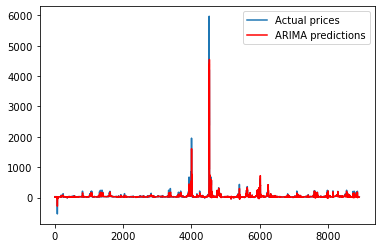

In [16]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test, label = '')
# plt.legend([])
plt.plot(predictions, color='red')
plt.legend(['Actual prices', 'ARIMA predictions'])
plt.savefig('../output/'
                + regional_ISO_name + '/arima/'
                + regional_ISO_name + SUB_FILE_NAME_PLOT_FUTURE)
plt.show()

In [17]:
# savePredictionsFor(regional_ISO_name, isArima=False, predictionArr = predictions)
isArima = False
root_dir = '/output/' + regional_ISO_name
if isArima:
         root_dir = root_dir + '/' + DIRECTORY_NAME_ARIMA

fullpath = os.getcwd()
projectPath = Path(fullpath).parents[0]
outputDirPath = Path(str(projectPath) + root_dir)
pdSeries = pd.Series(predictions)
with open(os.path.join(outputDirPath, 'JUL2019_arima_prediction.csv'), "w") as file1:
    pdSeries.to_csv(file1, index=False, header=False)